In [59]:
import numpy as np
from typing import Tuple

from src.visualization import plot_viterbi_path_binary, plot_viterbi_matrix

In [60]:
# haven't tried this since the probabilities in this problem already come "log-ized"
def convert_to_log_prob(arr: np.array) -> np.array:
    return np.log2(arr)

In [52]:
def viterbi_logprobs(
    A: np.array, B: np.array, PI: np.array
) -> Tuple[np.array, list, float]:
    """
    A: transition matrix -> NxN where N is the number of states that can occur (e.g. Noun, Verbs, Adjectives, etc)
    B: observation matrix (probability that a word belongs to state) -> NxT where T is the length of the sentence.
    PI: initial probabilities matrix (probability of a word of being in the beginning of the sentence 1xN.
    """
    # variable initialization
    N = A.shape[0]
    T = B.shape[1]
    viterbi = np.full((N, T), -np.inf)
    backpointer = []

    # initialization step
    viterbi[:, 0] = PI[0] + B[:, 0]
    best_arg = np.argmax(viterbi[:, 0])
    backpointer.append(best_arg)

    for i in range(1, T):
        viterbi[:, i] = viterbi[backpointer[-1], i - 1] + A[backpointer[-1]] + B[:, i]
        best_arg = np.argmax(viterbi[:, i])
        backpointer.append(best_arg)

    best_logprobability = np.max(viterbi[:, -1])

    return viterbi, backpointer, best_logprobability

In [53]:
# Toy example from the slides, take into account they are considered to be log probabilities
PI = np.array(
    [
        # N, V
        [-1, -2]
    ]
)
A = np.array(
    [
        # N,  V,
        [-3, -1],  # N
        [-1, -3],  # V
    ]
)
B = np.array(
    [
        # they can fish
        [-2, -3, -3],  # N
        [-10, -1, -3],  # V
    ]
)
sentence = "they can fish"

In [54]:
viterbi_logprobs(A, B, PI)

(array([[ -3.,  -9.,  -9.],
        [-12.,  -5., -11.]]),
 [0, 1, 0],
 -9.0)

In [55]:
# Toy example from the slides, take into account they are considered to be log probabilities
PI = np.array([-1, -3, -3, -4, -4])
A = np.array(
    [
        # ADJ, ADV, DET, NOUN, VERB
        [-3, -4, -np.inf, -2, -3],  # ADJ
        [-3, -3, -4, -4, -3],  # ADV
        [-2, -4, -np.inf, -0.5, -4],  # DET
        [-4, -4, -4, -3, -2],  # NOUN
        [-3, -2, -4, -3, -np.inf],  # VERB
    ]
)
B = np.array(
    [
        # the     aged     bottle   flies    fast
        [-np.inf, -2,      -np.inf, -np.inf, -2],  # ADJ
        [-np.inf, -np.inf, -np.inf, -np.inf, -1],  # ADV
        [-1,      -np.inf, -np.inf, -np.inf, -np.inf],  # DET
        [-np.inf, -np.inf, -2,      -3,      -5],  # NOUN
        [-np.inf, -5,      -2,      -3,      -2],  # VERB
    ]
)
sentence = "the aged bottle flies fast"

In [56]:
viterbi_logprobs(A, B, PI)

(array([[-inf,  -6., -inf, -inf, -20.],
        [-inf, -inf, -inf, -inf, -18.],
        [ -2., -inf, -inf, -inf, -inf],
        [-inf, -inf, -10., -16., -23.],
        [-inf, -11., -11., -15., -inf]]),
 [2, 0, 3, 4, 1],
 -18.0)

In [57]:
num_to_tag = {0: "ADJ", 1: "ADV", 2: "DET", 3: "NOUN", 4: "VERB"}

In [58]:
for i in [2, 0, 3, 4, 1]:
    print(num_to_tag[i])

DET
ADJ
NOUN
VERB
ADV


# Plots

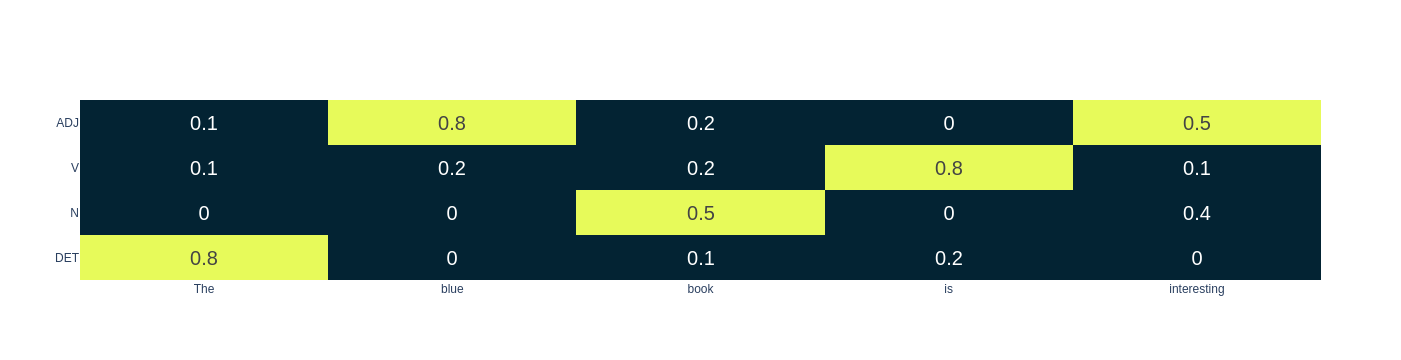

In [48]:
data = np.array(
    [
        # the blue book is interesting
        [0.8, 0.0, 0.1, 0.2, 0.0],  # DET
        [0.0, 0.0, 0.5, 0.0, 0.4],  # N
        [0.1, 0.2, 0.2, 0.8, 0.1],  # Verb
        [0.1, 0.8, 0.2, 0.0, 0.5],  # ADJ
    ]
)
backpointer = [0, 3, 1, 2, 3]
sentence = "The blue book is interesting"
tags = ["DET", "N", "V", "ADJ"]

plot_viterbi_path_binary(data, backpointer, sentence, tags)

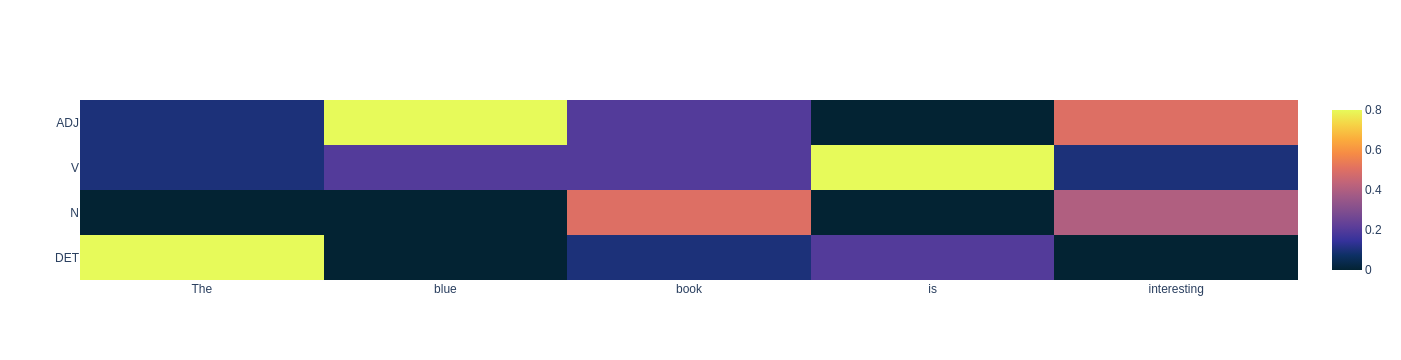

In [49]:
plot_viterbi_matrix(data, sentence, tags)